# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [30]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm
!pip install plotly

## Importing the necessary libraries

In [31]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

In [32]:
# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

In [33]:
# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations

In [34]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [35]:
# Import the first file - True.csv
true_df = pd.read_csv('True.csv', encoding='utf-8')

# Import the second file - Fake.csv
fake_df = pd.read_csv('Fake.csv', encoding='utf-8')


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [36]:
# Inspect the DataFrame with True News to understand the given data
true_df.head(5)  # Display the first 5 rows of the true_df DataFrame

,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"


In [37]:
# Inspect the DataFrame with Fake News to understand the given data
fake_df.head(5)  # Display the first 5 rows of the fake_df DataFrame

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"


In [38]:
# Print the column details for True News DataFrame
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [39]:
# Print the column details for Fake News Dataframe
fake_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [40]:
# Print the column names of both DataFrames
print("True News Columns:", true_df.columns.tolist())
print("Fake News Columns:", fake_df.columns.tolist())

True News Columns: ['title', 'text', 'date']
Fake News Columns: ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [41]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1  # Assign label "1" for true news
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0  # Assign label "0" for fake news

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [42]:
# Combine the true and fake news DataFrames into a single DataFrame
combo_df = pd.concat([true_df, fake_df], ignore_index=True)  # Concatenate DataFrames

In [43]:
# Display the first 5 rows of the combined DataFrame to verify the result
combo_df.head(1)  

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1


In [44]:
combo_df.info()  # Display information about the combined DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44940 entries, 0 to 44939
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44919 non-null  object
 1   text        44919 non-null  object
 2   date        44898 non-null  object
 3   news_label  44940 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


Observation - date and news_label are blank for a few rows


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [45]:
# Check Presence of Null Values
combo_df.isnull().sum()  # Count null values in each column

title         21
text          21
date          42
news_label     0
dtype: int64

In [46]:
# Handle Rows with Null Values
# as the count of null values is very low, we can drop the rows with null values
combo_df.dropna(inplace=True)  # Drop rows with any null values

In [47]:
# check the updated DataFrame for null values
combo_df.isnull().sum()  # Verify that there are no null values remaining

title         0
text          0
date          0
news_label    0
dtype: int64

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [48]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
# Combine title and text
combo_df['news_text'] = combo_df['title'] + '. ' + combo_df['text']  
# Drop the irrelevant columns from the DataFrame as they are no longer needed
combo_df.drop(columns=['title', 'text'], inplace=True)  # Drop the original title and text columns
# Display the first 5 rows of the updated DataFrame to check the result
combo_df.head(5)  

,date,news_label,news_text
0,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [49]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame() 
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = combo_df['news_label']  

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [50]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(text):
    # Convert to lower case
    text = text.lower()
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    # Remove punctuation and special characters (except alphanumeric and spaces)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # Remove words with numbers
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text 

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [51]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['news_text'] = combo_df['news_text'].apply(clean_text)  # Clean the news text

In [52]:
df_clean.head(5)  # Display the first 5 rows of the cleaned DataFrame

,news_label,news_text
0,1,as us budget fight looms republicans flip thei...
1,1,us military to accept transgender recruits on ...
2,1,senior us republican senator let mr mueller do...
3,1,fbi russia probe helped by australian diplomat...
4,1,trump wants postal service to charge much more...


In [53]:
df_clean.shape # Display information about the cleaned DataFrame

(44898, 2)

In [54]:
# Check the null values 
df_clean.isnull().sum()  # Count null values in each column of the cleaned DataFrame

news_label    0
news_text     0
dtype: int64

In [55]:
# delete the null values if any
df_clean.dropna(inplace=True)  # Drop rows with any null values in the cleaned DataFrame

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [56]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def filter_pos_lemmas_noun(text):
    # Process the text with spaCy
    doc = nlp(text)

    filtered_nouns = [
        token.lemma_ for token in doc
        if token.pos_ == "NOUN"                # Keep only common nouns (NN, NNS)
        and not token.is_stop                  # Exclude stopwords
        and token.is_alpha                     # Keep only alphabetic tokens
    ]

    # Join the filtered nouns into a single string
    return ' '.join(filtered_nouns)


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [57]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['news_text_lemmas'] = df_clean['news_text'].apply(filter_pos_lemmas_noun)  # Apply POS tagging and lemmatization

### Save the Cleaned data as a csv file (Recommended)

In [58]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)


In [59]:
df_clean = pd.read_csv("clean_df.csv")

In [60]:
# Check the first few rows of the DataFrame
df_clean.head(5)  

,news_label,news_text,news_text_lemmas
0,1,as us budget fight looms republicans flip thei...,budget fight script head faction month expansi...
1,1,us military to accept transgender recruits on ...,military transgender recruit people time milit...
2,1,senior us republican senator let mr mueller do...,mueller job counsel investigation link electio...
3,1,fbi russia probe helped by australian diplomat...,probe diplomat trump campaign adviser diplomat...
4,1,trump wants postal service to charge much more...,trump service service ship package amzno fight...


In [61]:
# Count of news_label in df_clean DataFrame
df_clean['news_label'].value_counts()  # Count occurrences of each news label (0 for fake, 1 for true)

news_label
0    23481
1    21417
Name: count, dtype: int64

In [62]:
# Check the dimensions of the DataFrame
df_clean.shape  

(44898, 3)

In [63]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   news_label        44898 non-null  int64 
 1   news_text         44889 non-null  object
 2   news_text_lemmas  44878 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [64]:
df_clean.isnull().sum()  # Check for any null values in the DataFrame

news_label           0
news_text            9
news_text_lemmas    20
dtype: int64

In [65]:
# delete the null values if any
df_clean.dropna(inplace=True)  

## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [66]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
import sklearn.model_selection as model_selection  
# Split the DataFrame into training and validation sets
train_df, valid_df = model_selection.train_test_split(
    df_clean, test_size=0.3, random_state=42, stratify=df_clean['news_label']
)  # Stratified split to maintain label distribution

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [67]:
# Add a new column to calculate the character length of cleaned news text
train_df['news_text_length'] = train_df['news_text'].apply(len) 

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['news_text_lemmas_length'] = train_df['news_text_lemmas'].apply(len)

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

<Axes: >

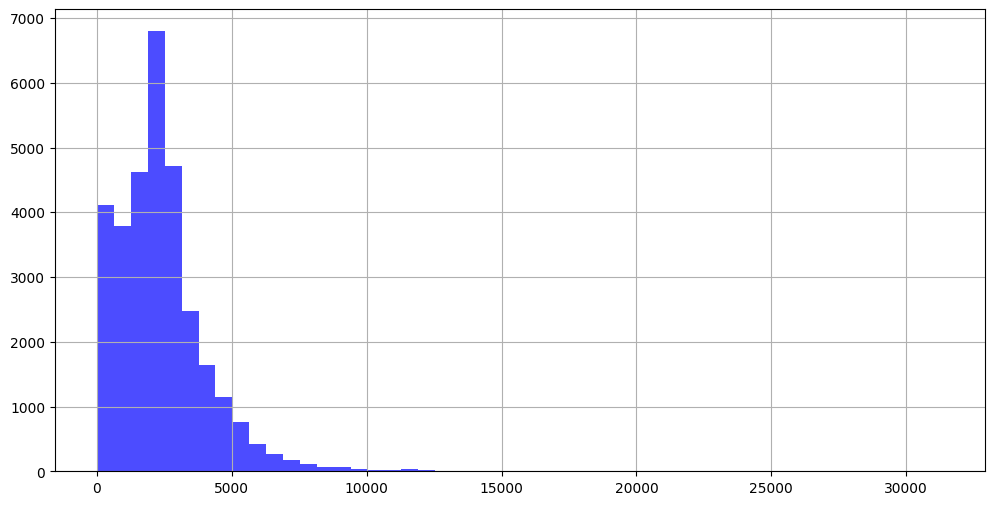

In [68]:
# Create a histogram plot to visualise character lengths
# Add histogram for cleaned news text
train_df['news_text_length'].hist(bins=50, figsize=(12, 6), color='blue', alpha=0.7)


<Axes: >

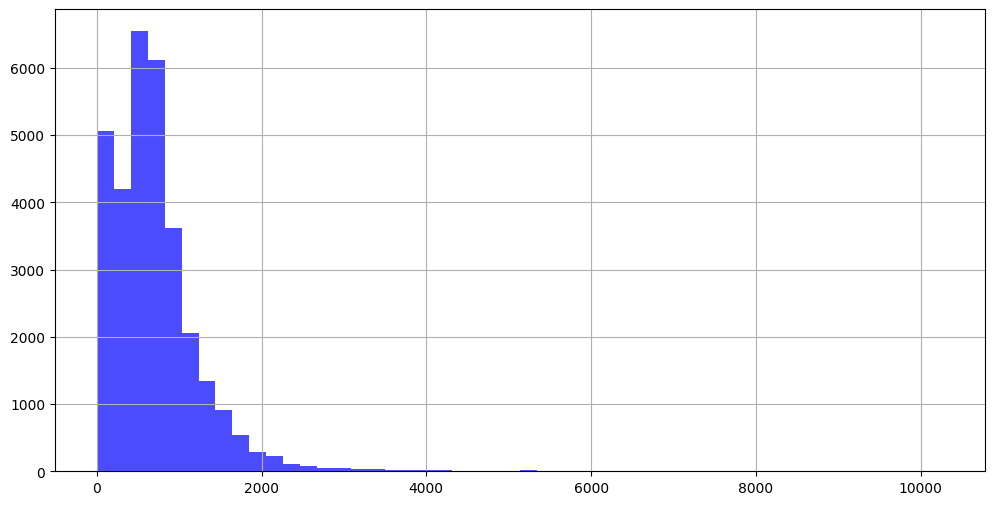

In [69]:
# Add histogram for lemmatized news text with POS tags removed
train_df['news_text_lemmas_length'].hist(bins=50, figsize=(12, 6), color='blue', alpha=0.7)

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

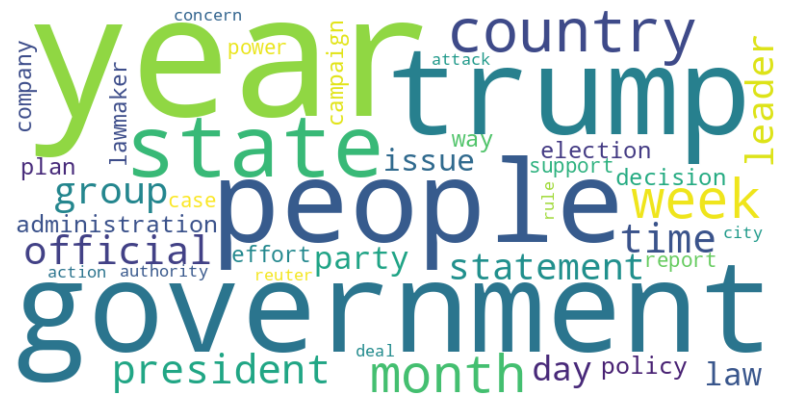

In [70]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

from wordcloud import WordCloud 
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
text= ' '.join(train_df[train_df['news_label'] == 1]['news_text_lemmas'].astype(str))  # Join all lemmatized text for True News
# Generate word cloud for True News
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=40).generate(text)

# Display the word cloud for True News
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

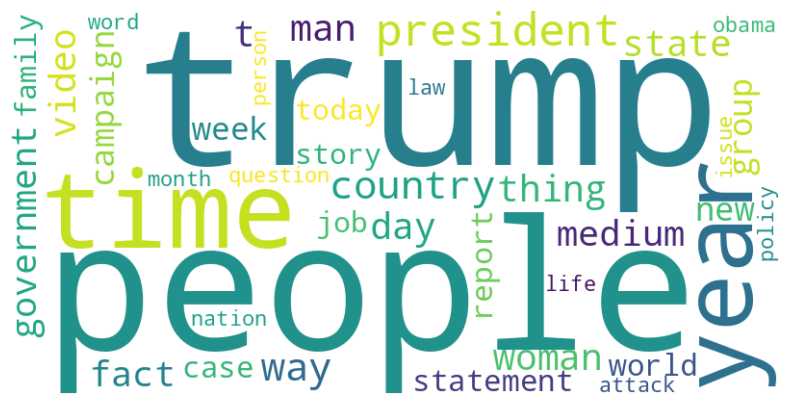

In [71]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
text_fake= ' '.join(train_df[train_df['news_label'] == 0]['news_text_lemmas'].astype(str))  # Join all lemmatized text for True News
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
wordcloud_fake = WordCloud(width=800, height=400, background_color='white',max_words=40).generate(text_fake)
# Generate word cloud for Fake News

# Display the word cloud for True News
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
# Write a function to get the specified top n-grams
def get_top_ngrams(corpus, iRange=(1,1),top_n=10):

    # Create a CountVectorizer instance with the specified n-gram range and stop words
    vectorizer = CountVectorizer(ngram_range=iRange, stop_words='english')
    X = vectorizer.fit_transform(corpus.astype(str)) 
    

    # Sum up the counts of each n-gram
    ngram_freq = X.sum(axis=0).A1
    ngram_names = vectorizer.get_feature_names_out()
    
    # Create a DataFrame with n-grams and their frequencies
    ngram_df = pd.DataFrame({'ngram': ngram_names, 'frequency': ngram_freq})
 
    
    return ngram_df.sort_values(by='frequency', ascending=False).head(top_n)

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [74]:
# Handle NaN values in the text data
train_df['news_text_lemmas'].fillna('')

37651    hunt trump team leaker president search leak h...
38031    cost obamacare campaign event business owner h...
5185     trump nod taxcredit proposal use tax credit pe...
34224    disaster capitalist bill relief donation earth...
20679    trump predecessor negotiation pressure program...
                               ...                        
13104    way samesex marriage couple country law contra...
1892     plan dreamer program response administration r...
21667    internet cringe photographer pic trump nutsack...
10922    health vaccine year health official vaccine zi...
30259    sander school guess school student candidate s...
Name: news_text_lemmas, Length: 31414, dtype: object

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

            ngram  frequency
25590       trump      22037
23597       state      14165
10312  government      13841
27404        year      13313
18333      people      10849
7735     election       9905
5665      country       9548
17294    official       9306
3764     campaign       7819
10520       group       7722


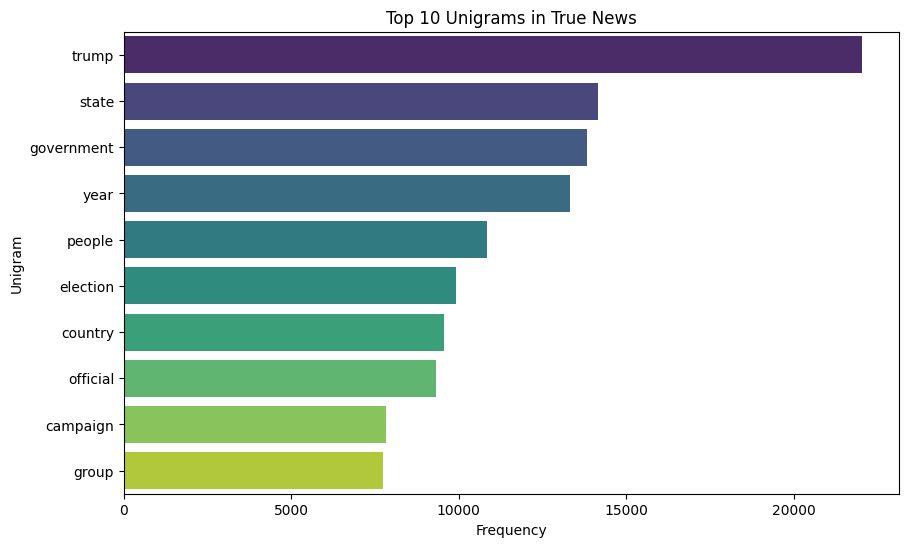

In [75]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_unigrams = get_top_ngrams(train_df[train_df['news_label'] == 1]['news_text_lemmas'], iRange=(1,1), top_n=10)
print(top_unigrams)

# Plot the top 10 unigrams for true news
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='ngram', data=top_unigrams, palette='viridis')
plt.title('Top 10 Unigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                       ngram  frequency
361618       news conference        957
586809        trump campaign        947
586486  trump administration        829
505682        security force        741
472892       request comment        714
99720         climate change        711
559578            tax reform        708
401005       percent percent        700
279027   intelligence agency        618
262148  house representative        616


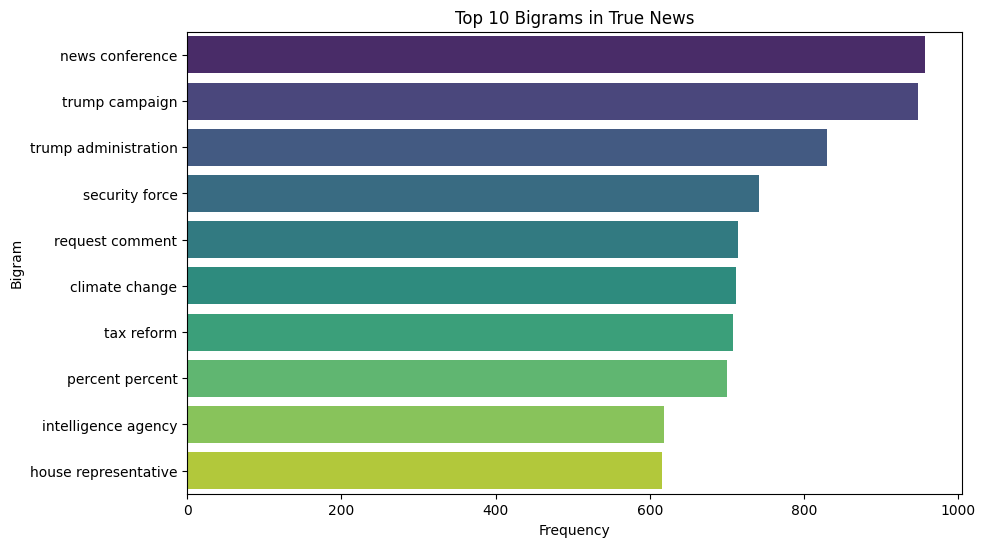

In [76]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_bigrams = get_top_ngrams(train_df[train_df['news_label'] == 1]['news_text_lemmas'], iRange=(2,2), top_n=10)

print(top_bigrams)

# Plot the top 10 bigrams for true news
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='ngram', data=top_bigrams, palette='viridis')
plt.title('Top 10 Bigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()



##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                                   ngram  frequency
675458      official condition anonymity        242
1028401                 tax rate percent        160
62765          article staff involvement        122
510352   involvement creation production        122
972412        staff involvement creation        122
979258         state department official        120
1106498                 use email server        114
832502              rate percent percent        106
1093484            trump transition team         97
734592           percent percent percent         93


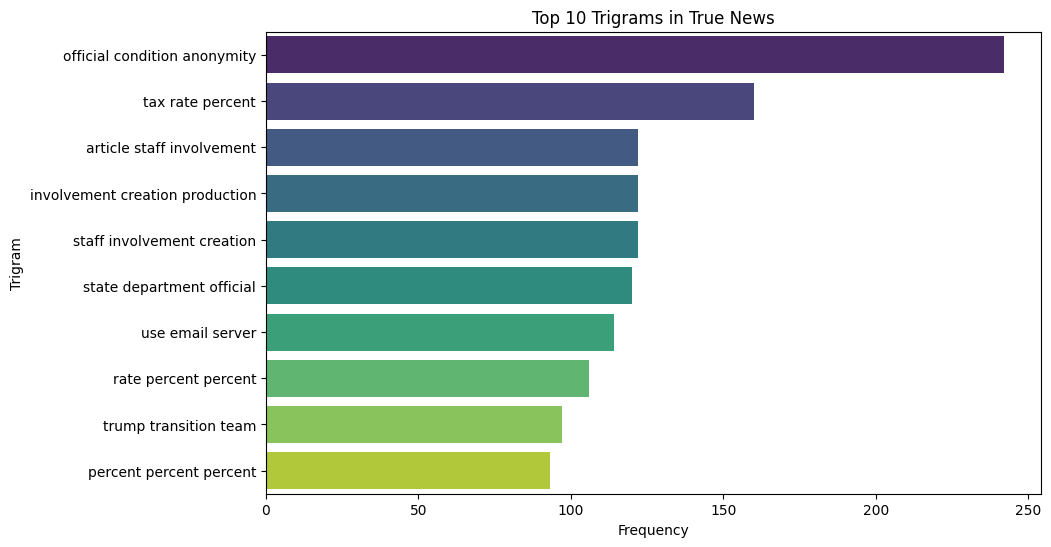

In [77]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

top_trigrams = get_top_ngrams(train_df[train_df['news_label'] == 1]['news_text_lemmas'], iRange=(3,3), top_n=10)
print(top_trigrams)
# Plot the top 10 trigrams for true news
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='ngram', data=top_trigrams, palette='viridis')
plt.title('Top 10 Trigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

           ngram  frequency
56323      trump      34654
39076     people      18300
55049       time      11326
61339       year      10528
41591  president      10161
26085      image       9712
51353      state       8935
60643      woman       8388
58324      video       8093
35357       news       7736


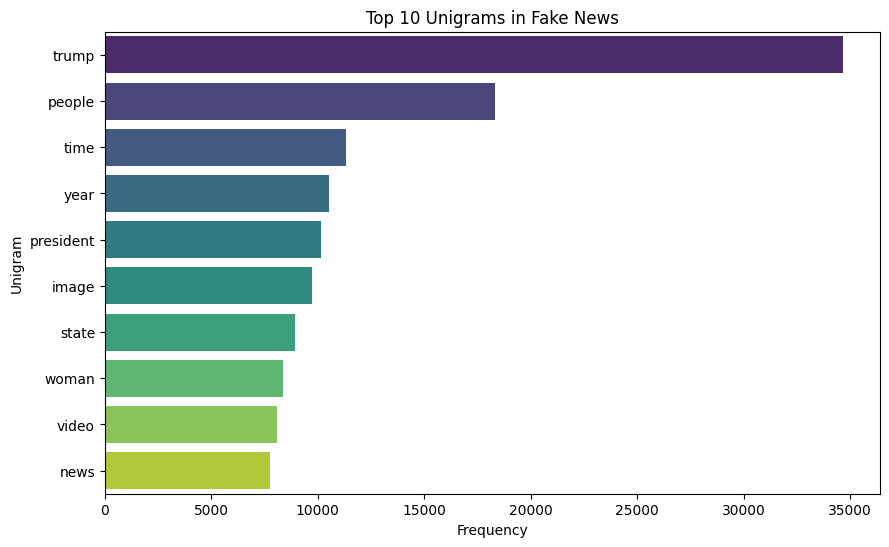

In [78]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_unigrams_fake = get_top_ngrams(train_df[train_df['news_label'] == 0]['news_text_lemmas'], iRange=(1,1), top_n=10)
print(top_unigrams_fake)
# Plot the top 10 unigrams for fake news
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='ngram', data=top_unigrams_fake, palette='viridis')
plt.title('Top 10 Unigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()



##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                        ngram  frequency
647341        trump supporter       1414
294594            image image       1296
91564            century wire       1198
460182         police officer       1178
643687         trump campaign       1119
331853        law enforcement       1041
548248         screen capture        928
184176           donald trump        914
646640  trump realdonaldtrump        815
355512      mainstream medium        749


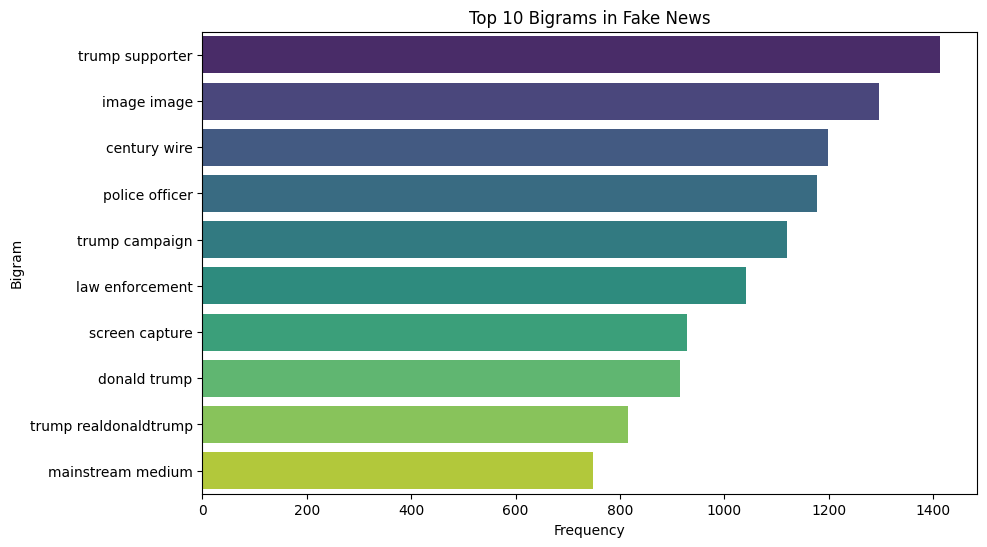

In [79]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams_fake = get_top_ngrams(train_df[train_df['news_label'] == 0]['news_text_lemmas'], iRange=(2,2), top_n=10)
print(top_bigrams_fake)
# Plot the top 10 bigrams for fake news
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='ngram', data=top_bigrams_fake, palette='viridis')
plt.title('Top 10 Bigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                           ngram  frequency
604854         news century wire        614
1042830     video screen capture        520
440192        image video screen        479
439366         image getty image        347
439882      image screen capture        304
439115          image chip image        179
133664         century wire file        176
440194    image video screenshot        164
496360   law enforcement officer        157
133715       century wire member        140


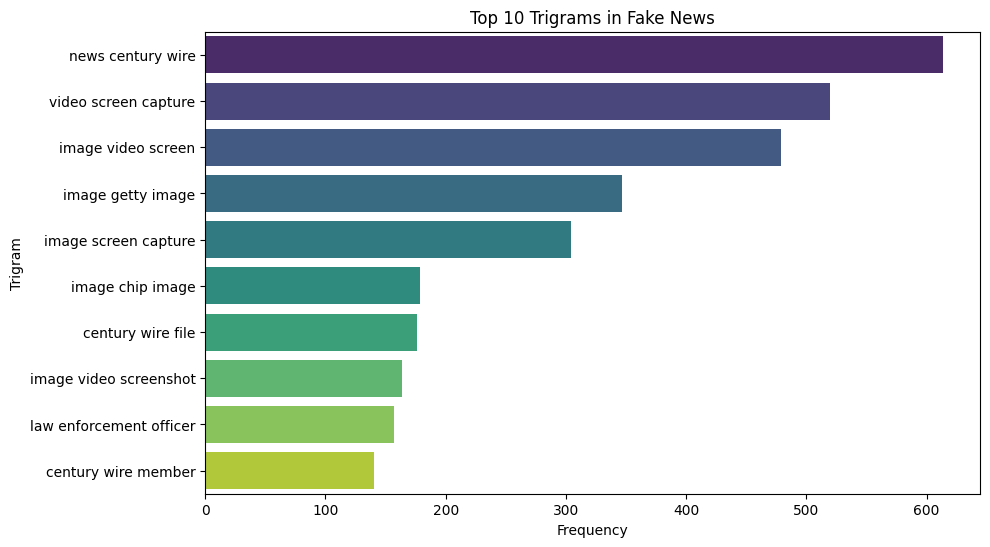

In [80]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_trigrams_fake = get_top_ngrams(train_df[train_df['news_label'] == 0]['news_text_lemmas'], iRange=(3,3), top_n=10)
print(top_trigrams_fake)
# Plot the top 10 trigrams for fake news
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='ngram', data=top_trigrams_fake, palette='viridis')
plt.title('Top 10 Trigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()


## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [81]:
# Add a new column to calculate the character length of cleaned news text
valid_df['news_text_length'] = valid_df['news_text'].apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
valid_df['news_text_lemmas_length'] = valid_df['news_text_lemmas'].apply(len)

##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

<Axes: >

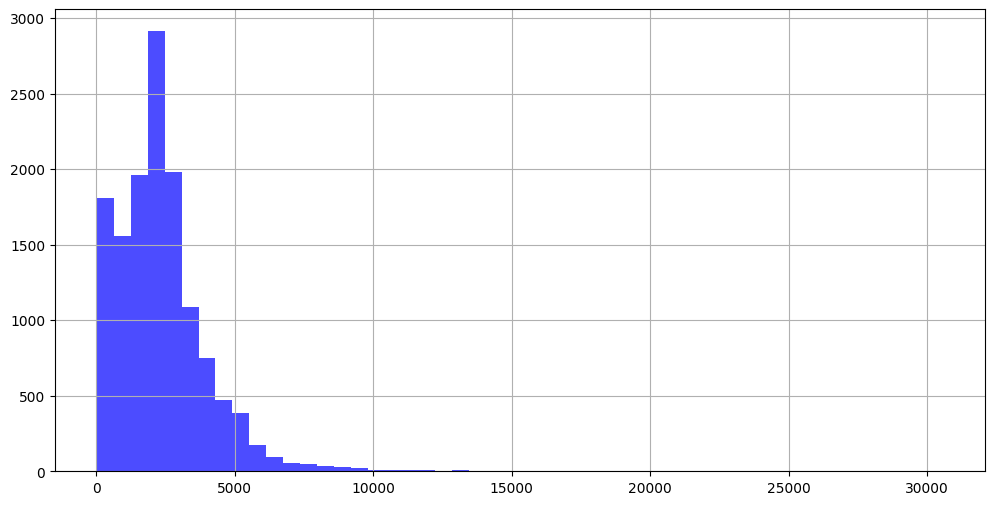

In [82]:
# Create a histogram plot to visualise character lengths
valid_df['news_text_length'].hist(bins=50, figsize=(12, 6), color='blue', alpha=0.7)  # Add histogram for cleaned news text



<Axes: >

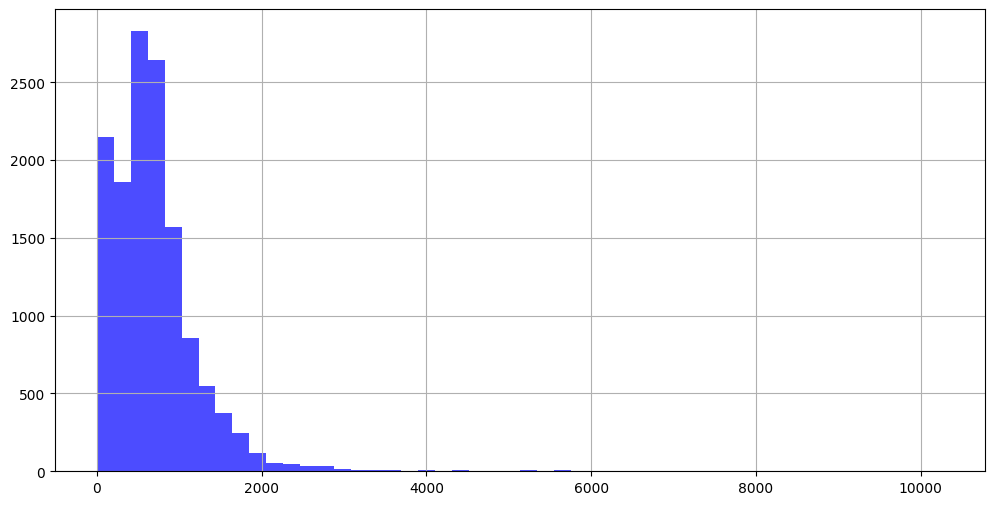

In [83]:
# Add histogram for cleaned news text
valid_df['news_text_lemmas_length'].hist(bins=50, figsize=(12, 6), color='blue', alpha=0.7)

<Axes: >

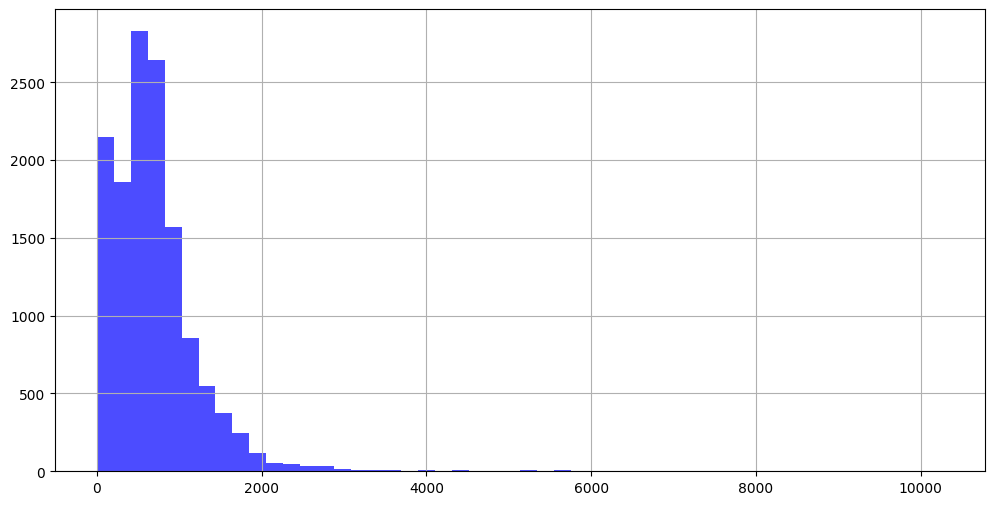

In [84]:
# Add histogram for lemmatized news text with POS tags removed
valid_df['news_text_lemmas_length'].hist(bins=50, figsize=(12, 6), color='blue', alpha=0.7)

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

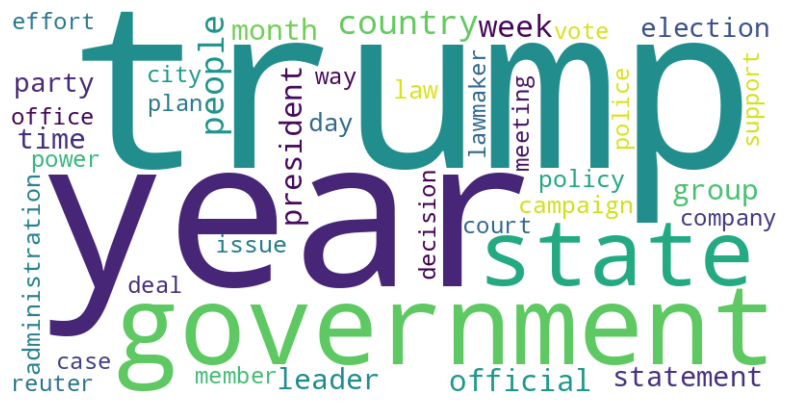

In [85]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

from wordcloud import WordCloud 
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
text= ' '.join(valid_df[valid_df['news_label'] == 1]['news_text_lemmas'].astype(str))  # Join all lemmatized text for True News
# Generate word cloud for True News
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=40).generate(text)

# Display the word cloud for True News
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

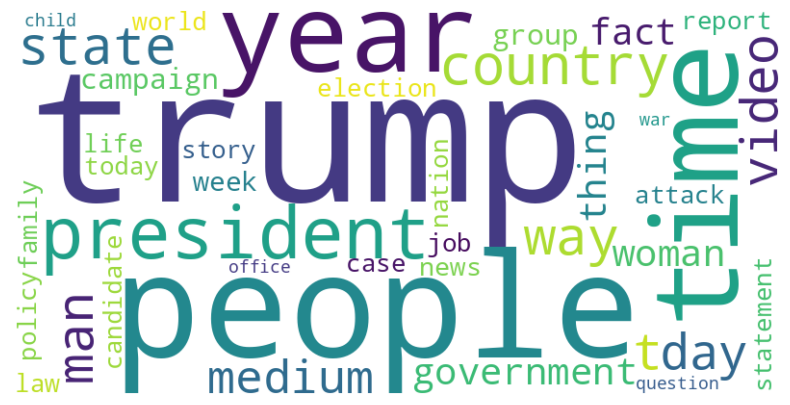

In [86]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
text_fake= ' '.join(valid_df[valid_df['news_label'] == 0]['news_text_lemmas'].astype(str))  # Join all lemmatized text for True News
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
wordcloud_fake = WordCloud(width=800, height=400, background_color='white',max_words=40).generate(text_fake)
# Generate word cloud for Fake News

# Display the word cloud for True Newsa
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.show()

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.2 Handle the NaN values

In [87]:
## First handle NaN values in the text data
valid_df['news_text_lemmas'].fillna('')

17806    court candidate ballot board aukot percent ele...
27788    paper time paper world mogul money account ord...
39203    director circle room trump weapon director off...
12891    govt delegation peace talk negotiating team pe...
42639    member state member relative citizen alien sta...
                               ...                        
23457    mccain party investigation patriot mccain shen...
44294    boiler room tech tune radio network acr broadc...
17425    agency politician north talk missile program e...
615      trump thank player thank basketball player sho...
30724    regime tactic subject crime security adviser s...
Name: news_text_lemmas, Length: 13464, dtype: object

### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

            ngram  frequency
17017       trump       9048
15661       state       6108
6946   government       5813
18210        year       5653
12113      people       4484
5177     election       4345
3778      country       4179
11427    official       3980
11929       party       3327
9181       leader       3224


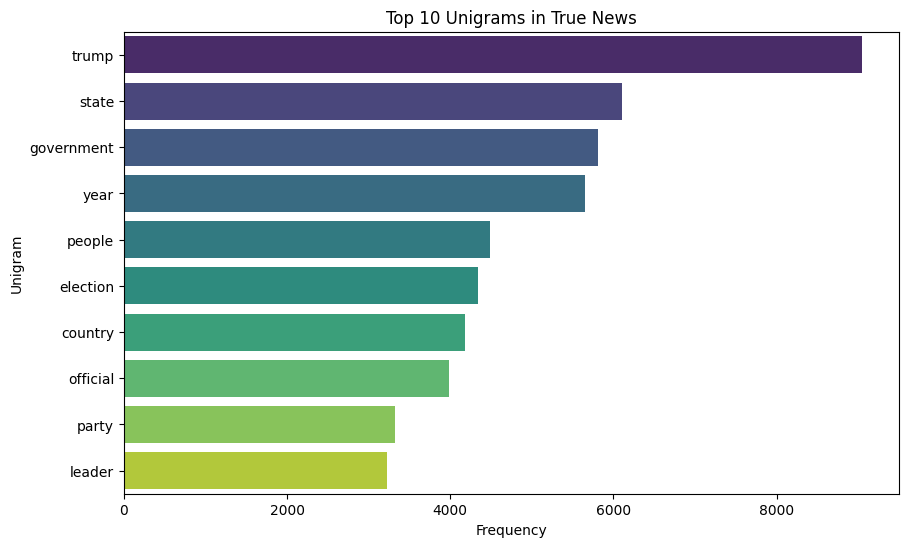

In [88]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_unigrams = get_top_ngrams(valid_df[valid_df['news_label'] == 1]['news_text_lemmas'], iRange=(1,1), top_n=10)
print(top_unigrams)

# Plot the top 10 unigrams for true anews
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='ngram', data=top_unigrams, palette='viridis')
plt.title('Top 10 Unigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

                       ngram  frequency
186578       news conference        424
304985        trump campaign        358
304767  trump administration        330
207611       percent percent        326
245838       request comment        321
290653            tax reform        310
51445         climate change        299
143797   intelligence agency        276
262522        security force        260
135317  house representative        258


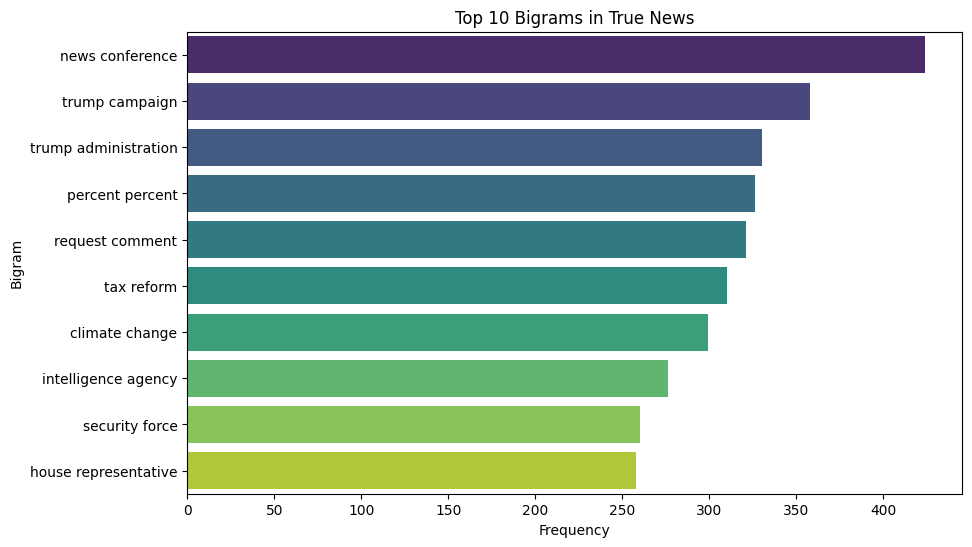

In [89]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_bigrams = get_top_ngrams(valid_df[valid_df['news_label'] == 1]['news_text_lemmas'], iRange=(2,2), top_n=10)

print(top_bigrams)

# Plot the top 10 bigrams for true news
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='ngram', data=top_bigrams, palette='viridis')
plt.title('Top 10 Bigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()



##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

                                  ngram  frequency
297873     official condition anonymity         94
455559                 tax rate percent         78
224764  involvement creation production         58
27713         article staff involvement         58
430258       staff involvement creation         58
433282        state department official         57
368354             rate percent percent         54
490487                 use email server         44
324601          percent percent percent         43
419033         signature healthcare law         39


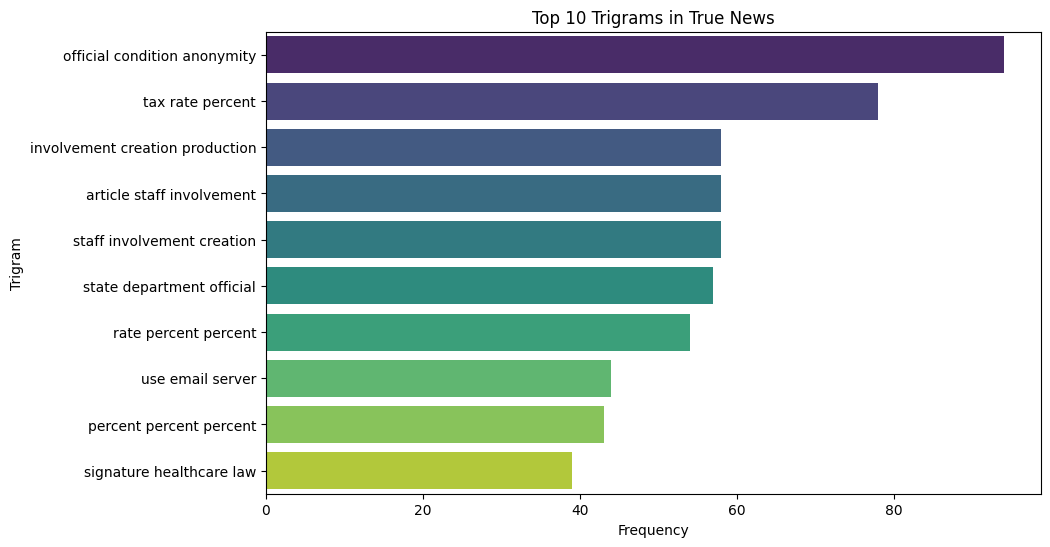

In [90]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_trigrams = get_top_ngrams(valid_df[valid_df['news_label'] == 1]['news_text_lemmas'], iRange=(3,3), top_n=10)
print(top_trigrams)
# Plot the top 10 trigrams for true news
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='ngram', data=top_trigrams, palette='viridis')
plt.title('Top 10 Trigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

           ngram  frequency
34500      trump      14357
23961     people       7972
33716       time       4611
37459       year       4330
25461  president       4303
16034      image       4113
31540      state       3827
35706      video       3400
7460     country       3343
4611    campaign       3320


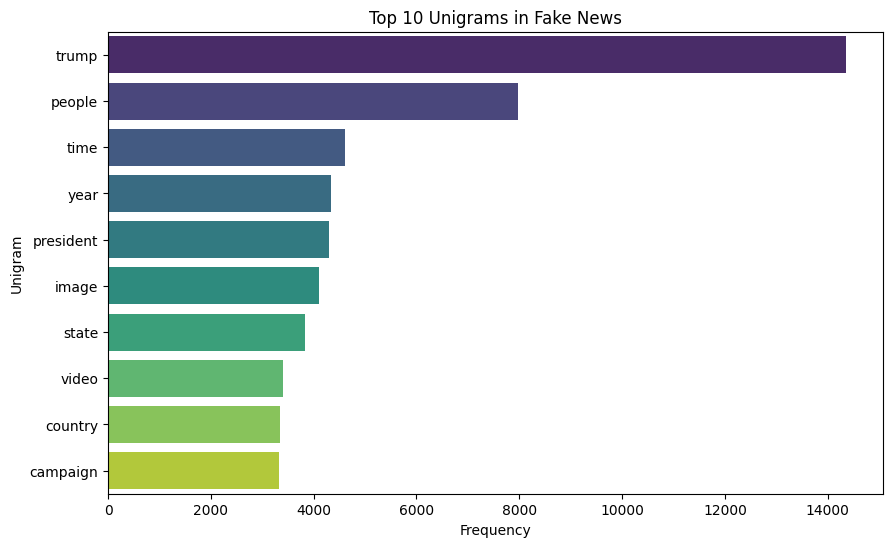

In [91]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_unigrams_fake = get_top_ngrams(valid_df[valid_df['news_label'] == 0]['news_text_lemmas'], iRange=(1,1), top_n=10)
print(top_unigrams_fake)
# Plot the top 10 unigrams for fake news
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='ngram', data=top_unigrams_fake, palette='viridis')
plt.title('Top 10 Unigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

                  ngram  frequency
354579  trump supporter        652
160683      image image        595
352222   trump campaign        521
251125   police officer        513
180759  law enforcement        499
49870      century wire        496
300036   screen capture        403
100583     donald trump        392
58914    climate change        357
34211       boiler room        299


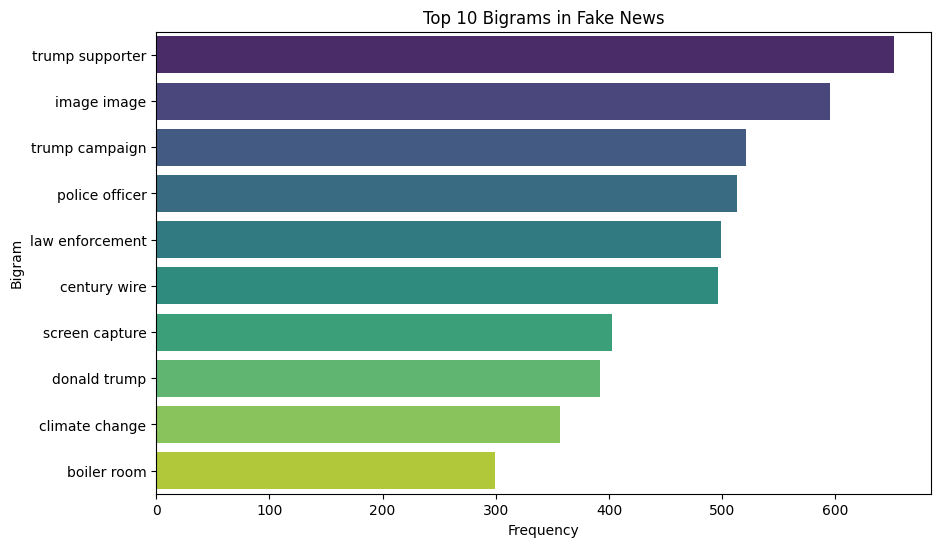

In [92]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams_fake = get_top_ngrams(valid_df[valid_df['news_label'] == 0]['news_text_lemmas'], iRange=(2,2), top_n=10)
print(top_bigrams_fake)
# Plot the top 10 bigrams for fake news
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='ngram', data=top_bigrams_fake, palette='viridis')
plt.title('Top 10 Bigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

                              ngram  frequency
297516            news century wire        263
512969         video screen capture        208
217379           image video screen        183
217003            image getty image        155
217219         image screen capture        143
49118         broadcast boiler room         83
296662        network acr broadcast         76
216880             image chip image         76
337727  philosopher moralist corner         76
461002        talk radio custommade         76


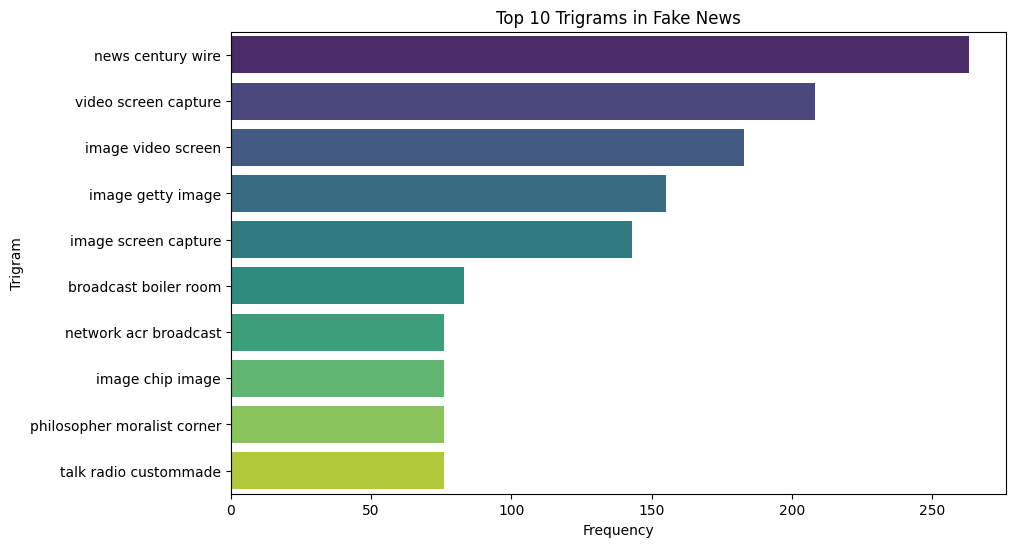

In [93]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_trigrams_fake = get_top_ngrams(valid_df[valid_df['news_label'] == 0]['news_text_lemmas'], iRange=(3,3), top_n=10)
print(top_trigrams_fake)
# Plot the top 10 trigrams for fake news
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='ngram', data=top_trigrams_fake, palette='viridis')
plt.title('Top 10 Trigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [94]:
import gensim.downloader as api


In [95]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
word2vec_model = api.load("word2vec-google-news-300")


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [96]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
# define a function to make each row/document a single vector by averaging the word vectors
def get_average_vector(text, model):
    # Tokenize the text
    tokens = text.split()
    # Filter out tokens that are not in the model's vocabulary, Only keeps tokens for which a Word2Vec vector actually exists.
    valid_tokens = [token for token in tokens if token in model]
    # If there are no valid tokens, return a zero vector
    if not valid_tokens:
        return np.zeros(model.vector_size)
    # Get the vectors for the valid words and compute the mean
    vectors = np.array([model[word] for word in valid_tokens])
    return np.mean(vectors, axis=0)


In [97]:
## Extract the target variable for the training data and validation data
X_vectors_train = np.vstack(train_df['news_text_lemmas'].apply(lambda x: get_average_vector(x, word2vec_model)))
y_train = train_df['news_label']

X_vectors_valid = np.vstack(valid_df['news_text_lemmas'].apply(lambda x: get_average_vector(x, word2vec_model)))
y_valid = valid_df['news_label']


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [99]:
## Initialise Logistic Regression model

lgm_clf = LogisticRegression(max_iter=1000)  # Initialize Logistic Regression model with a higher max_iter for convergence

## Train Logistic Regression model on training data
lgm_clf.fit(X_vectors_train,y_train)

## Predict on validation data
y_pred=lgm_clf.predict(X_vectors_valid)


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [100]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_score(y_valid, y_pred), precision_score(y_valid, y_pred), recall_score(y_valid, y_pred), f1_score(y_valid, y_pred)

(0.9044117647058824,
 0.8968180413963547,
 0.9036575875486381,
 0.9002248236297388)

In [101]:
# Classification Report
print(classification_report(y_valid, y_pred, target_names=['Fake News', 'True News'])) 

              precision    recall  f1-score   support

   Fake News       0.91      0.91      0.91      7039
   True News       0.90      0.90      0.90      6425

    accuracy                           0.90     13464
   macro avg       0.90      0.90      0.90     13464
weighted avg       0.90      0.90      0.90     13464



In [102]:
# Define  a DataFrame to store the results
performance_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Add the performance metrics to a DataFrame for better visualization
row = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_valid, y_pred),
    'Precision':precision_score(y_valid, y_pred),
    'Recall': recall_score(y_valid, y_pred),
    'F1 Score': f1_score(y_valid, y_pred)
}

# Convert the row to a DataFrame

performance_metrics= pd.concat([performance_metrics, pd.DataFrame([row])], ignore_index=True)
# Display the performance metrics DataFrame
performance_metrics

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.904412,0.896818,0.903658,0.900225


### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [103]:
## Initialise Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)  

## Train Decision Tree model on training data
dt_clf.fit(X_vectors_train, y_train)

## Predict on validation data
y_pred_dt = dt_clf.predict(X_vectors_valid)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [104]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_score(y_valid, y_pred_dt), precision_score(y_valid, y_pred_dt), recall_score(y_valid, y_pred_dt), f1_score(y_valid, y_pred_dt)

(0.8240493166963755,
 0.8362068965517241,
 0.7850583657587549,
 0.8098258007545958)

In [105]:
# Classification Report
print(classification_report(y_valid, y_pred_dt, target_names=['Fake News', 'True News']))

              precision    recall  f1-score   support

   Fake News       0.81      0.86      0.84      7039
   True News       0.84      0.79      0.81      6425

    accuracy                           0.82     13464
   macro avg       0.83      0.82      0.82     13464
weighted avg       0.82      0.82      0.82     13464



In [106]:
# Add the performance metrics of decision tree to same DataFrame for better visualization
row = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_valid, y_pred_dt),
    'Precision':precision_score(y_valid, y_pred_dt),
    'Recall': recall_score(y_valid, y_pred_dt),
    'F1 Score': f1_score(y_valid, y_pred_dt)
}

# Convert the row to a DataFrame

performance_metrics= pd.concat([performance_metrics, pd.DataFrame([row])], ignore_index=True)
# Display the performance metrics DataFrame
performance_metrics

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.904412,0.896818,0.903658,0.900225
1,Decision Tree,0.824049,0.836207,0.785058,0.809826


### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [107]:
## Initialise Random Forest model
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100) 

## Train Random Forest model on training data
rf_clf.fit(X_vectors_train, y_train)

## Predict on validation data
y_pred_rf = rf_clf.predict(X_vectors_valid)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [108]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_score(y_valid, y_pred_rf), precision_score(y_valid, y_pred_rf), recall_score(y_valid, y_pred_rf), f1_score(y_valid, y_pred_rf)

(0.9109477124183006,
 0.9152892561983471,
 0.8963424124513618,
 0.9057167570967996)

In [109]:
# Classification Report
print(classification_report(y_valid, y_pred_rf, target_names=['Fake News', 'True News']))

              precision    recall  f1-score   support

   Fake News       0.91      0.92      0.92      7039
   True News       0.92      0.90      0.91      6425

    accuracy                           0.91     13464
   macro avg       0.91      0.91      0.91     13464
weighted avg       0.91      0.91      0.91     13464



In [110]:
row = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_valid, y_pred_rf),
    'Precision':precision_score(y_valid, y_pred_rf),
    'Recall': recall_score(y_valid, y_pred_rf),
    'F1 Score': f1_score(y_valid, y_pred_rf)
}

# Convert the row to a DataFrame

performance_metrics= pd.concat([performance_metrics, pd.DataFrame([row])], ignore_index=True)
# Display the performance metrics DataFrame
performance_metrics

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.904412,0.896818,0.903658,0.900225
1,Decision Tree,0.824049,0.836207,0.785058,0.809826
2,Random Forest,0.910948,0.915289,0.896342,0.905717


In [111]:
# Hyperparameter tuning for Random Forest model using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid for hyperparameter tuning
params= {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

In [112]:
# Create a GridSearchCV object with the Random Forest classifier and the parameter grid
rf= RandomForestClassifier(random_state=42)  # Initialize Random Forest classifier for hyperparameter tuning
grid_search = RandomizedSearchCV(rf,params, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_vectors_train, y_train)
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [113]:
# view the feature importances of the best Random Forest model
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [114]:
# Use the best Random Forest model to predict on validation data
y_pred_best_rf = best_rf.predict(X_vectors_valid)
# Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_score(y_valid, y_pred_best_rf), precision_score(y_valid, y_pred_best_rf), recall_score(y_valid, y_pred_best_rf), f1_score(y_valid, y_pred_best_rf)


(0.908868092691622, 0.9134584791600382, 0.8936964980544747, 0.9034694359216426)

In [115]:
row = {
    'Model': 'Random Forest (Hyperparameter Tuned)',
    'Accuracy': accuracy_score(y_valid, y_pred_best_rf),
    'Precision':precision_score(y_valid, y_pred_best_rf),
    'Recall': recall_score(y_valid, y_pred_best_rf),
    'F1 Score': f1_score(y_valid, y_pred_best_rf)
}

# Convert the row to a DataFrame

performance_metrics= pd.concat([performance_metrics, pd.DataFrame([row])], ignore_index=True)
# Display the performance metrics DataFrame
performance_metrics

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.904412,0.896818,0.903658,0.900225
1,Decision Tree,0.824049,0.836207,0.785058,0.809826
2,Random Forest,0.910948,0.915289,0.896342,0.905717
3,Random Forest (Hyperparameter Tuned),0.908868,0.913458,0.893696,0.903469


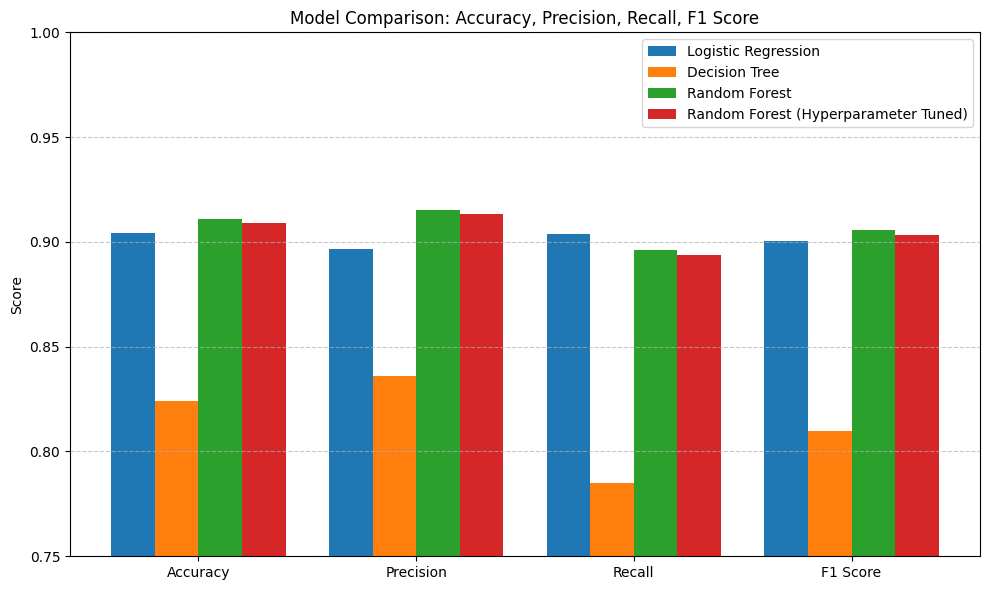

In [119]:
num_models = len(models)
x = np.arange(len(metrics))
bar_width = 0.8 / num_models  # adjust bar width so bars fit

offsets = np.linspace(-bar_width*(num_models-1)/2, bar_width*(num_models-1)/2, num_models)
colors = plt.cm.tab10.colors  # Get 10 distinct colors

plt.figure(figsize=(10, 6))

for i in range(num_models):
    model_scores = performance_metrics.loc[i, metrics].values
    plt.bar(x + offsets[i], model_scores, width=bar_width, label=models[i], color=colors[i % len(colors)])

# Formatting
plt.xticks(x, metrics)
plt.ylim(0.75, 1.0)
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy, Precision, Recall, F1 Score')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


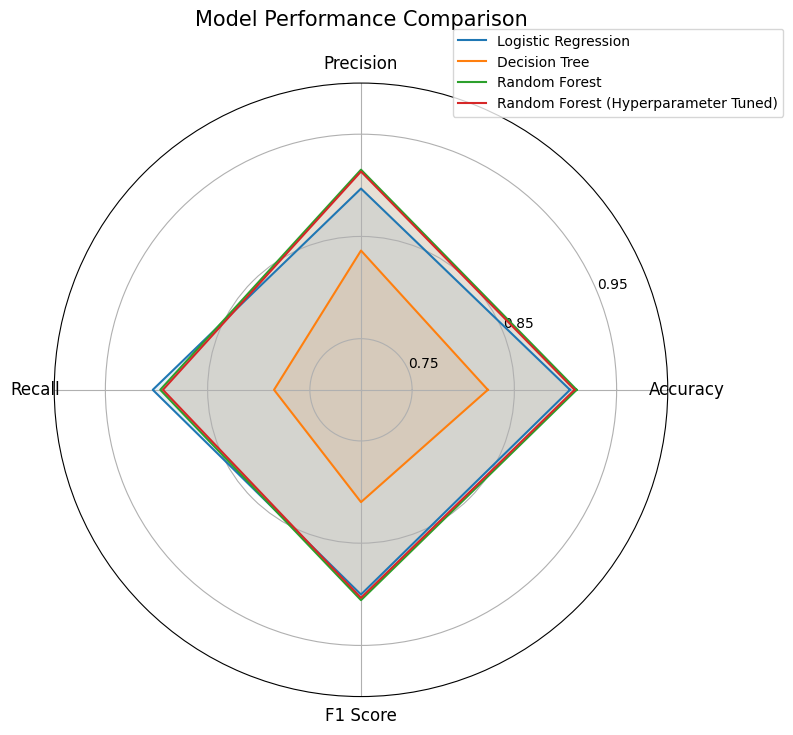

In [120]:
# Radar plot for model performance comparison in performance_metrics data frame 
# Metrics and angles
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
num_metrics = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  # to close the loop

# Plot setup
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each model
for i in range(len(performance_metrics)):
    values = performance_metrics.loc[i, metrics].tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, label=performance_metrics.loc[i, 'Model'])
    ax.fill(angles, values, alpha=0.1)

# Add metric labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=12)

# Set range and labels
ax.set_ylim(0.7, 1.0)
ax.set_yticks([0.75, 0.85, 0.95])
ax.set_yticklabels(['0.75', '0.85', '0.95'], fontsize=10)
ax.set_title("Model Performance Comparison", size=15, y=1.08)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.


1. Traditional NLP analysis like N Gram and or EDA like word cloud while they provide interesting insights on words prevalent in Fake news, are not consistent and have limited classification potential ​

2. Post clean up, lemmatization when used with pre trained model like ""word2vec-google-news-300" embedding , supervised models like Logistic regression and Random Forest provide good performance 

3. Random Forest is most preferred model due to better metrices while Logistic regression is close second​

4. Hyper parameter tuning of Random forest was not of much help in increasing the accuracy   

5. Random Forest (tuned) shows the best precision-recall balance, which is key for fake news detection:
High precision (0.9135) → Few false positives (not labeling real news as fake)
Good recall (0.8937) → Detects most fake news cases
But still Random Forest with tuning is preferreed as its gets better accuracy with comprimising on precision recall balance. Also better in terms of execution time. 
